# Homework 7

## Rui Fang $\quad$ Collaborator: /

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 9th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Gibbs Sampling On A Bivariate Normal

Let $\mathbf{X}$ be a random variable taking values in $\mathbb{R}^2$. That is, $\mathbf{X}$ is a 2-dimensional vector. Suppose that $\mathbf{X}$ is normally distributed as follows
$$ 
\mathbf{X} \sim \mathcal{N} \left(  
\left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right],
\left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right] \right).
$$ 
That is, the pdf of the distribution of $\mathbf{X}$ is
$$
f_{\mathbf{X}}(\mathbf{x}) = \frac{1}{2\pi\sqrt{\vert \Sigma\vert }}\mathrm{exp}\left\{ - \frac{1}{2} (\mathbf{x} - \mu)^\top \Sigma^{-1} (\mathbf{x} - \mu)\right\}
$$
where $\mu = \left[
\begin{array}{c}
    1  \\ 
    2  \\ 
  \end{array} 
\right]$, $\Sigma = \left[
  \begin{array}{ccc}
    4 & 1.2  \\ 
    1.2 & 4 \\ 
  \end{array} 
  \right]$, and $\vert \cdot\vert $ is the matrix determinant operator.

In the following, we will denote the random variable corresponding to the first component of $\mathbf{X}$ by $X_1$ and the second component by $X_2$.

* Write a Gibbs sampler for this distribution by sampling sequentially from the two conditional distributions $f_{X_1\vert X_2}, f_{X_2\vert X_1}$. 
* Choose a thinning parameter, burn-in factor and total number of iterations that allow you to take 10000 non-autocorrelated draws. 
* You must justify your choice of parameters. 

***

### *Solution*

By simplification, we find the two conditional distributions are two univariate normals given by 
$$ f(x_1 \vert x_2) = \mathcal{N}\left(\mu=1+\frac{3}{10}(x_2-2), \sigma^2=\frac{91}{25}\right),$$
$$ f(x_2 \vert x_1) = \mathcal{N}\left(\mu=2+\frac{3}{10}(x_1-1), \sigma^2=\frac{91}{25}\right).$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import seaborn as sns

%matplotlib notebook

sns.set()

<IPython.core.display.Javascript object>


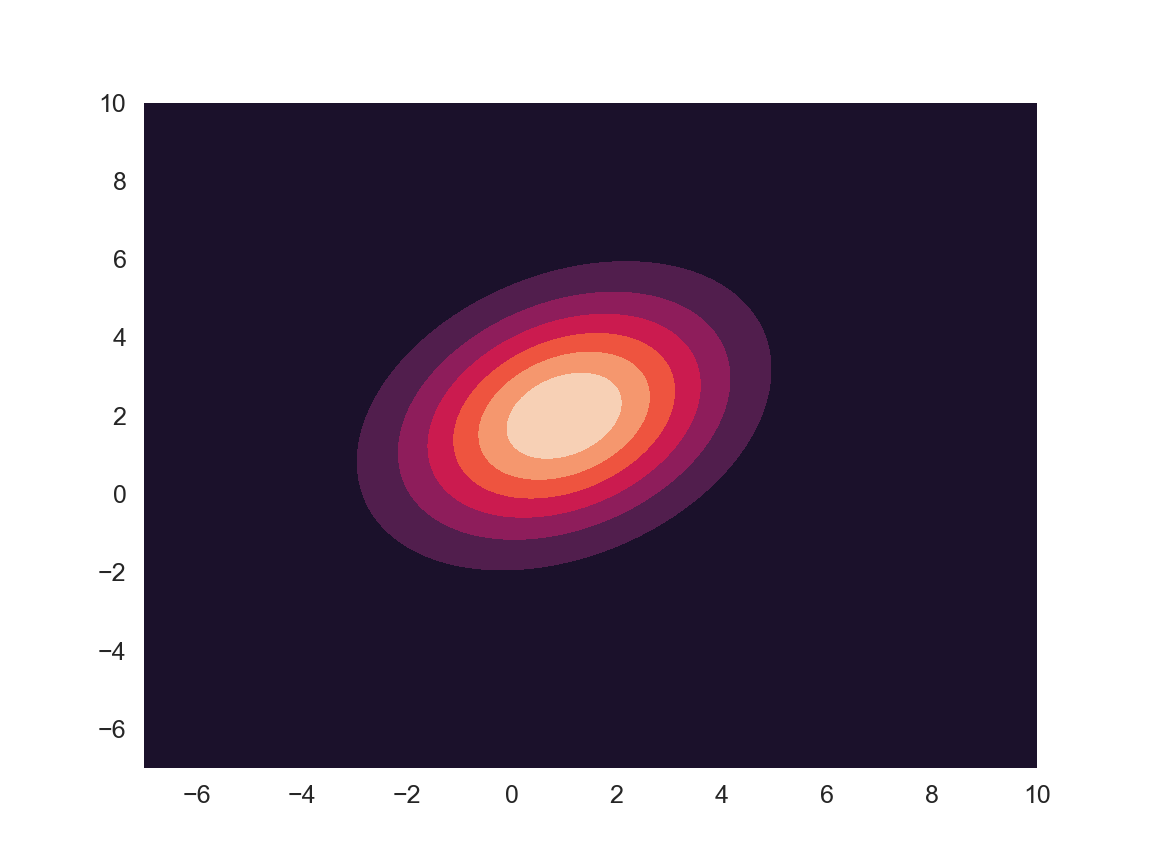

In [94]:
from scipy.stats import multivariate_normal

# First make a contour plot of the bivariate normal 
numgridpoints = 400
x = np.linspace(-7, 10, numgridpoints)
y = np.linspace(-7, 10, numgridpoints)
xx, yy = np.meshgrid(x, y)
zz = multivariate_normal.pdf(np.dstack((xx, yy)), mean=[1,2], cov=[[4,1.2],[1.2,4]])
plt.figure()
plt.contourf(xx, yy, zz)
plt.show()

In [93]:
# Gibbs sampler function (code adapted from the lecture example)
def gibbs(xgiveny_sample, ygivenx_sample, N, start = [0,0]):
    x=start[0]
    y=start[1]
    samples=np.zeros((N+1, 2))
    samples[0,0]=x
    samples[0,1]=y
    
    for i in range(1,N,2):
        x=xgiveny_sample(y)
        samples[i,0]=x
        samples[i, 1]=y
        
        y=ygivenx_sample(x)
        samples[i+1,0]=x
        samples[i+1,1]=y
        
    return samples

# Two conditionals 
def x1cond(x2):
    return norm.rvs(1+3*(x2-2)/10, scale=np.sqrt(91/25))
def x2cond(x1):
    return norm.rvs(2+3*(x1-1)/10, scale=np.sqrt(91/25))

# Make autocorrelation plot
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace), normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])

<IPython.core.display.Javascript object>


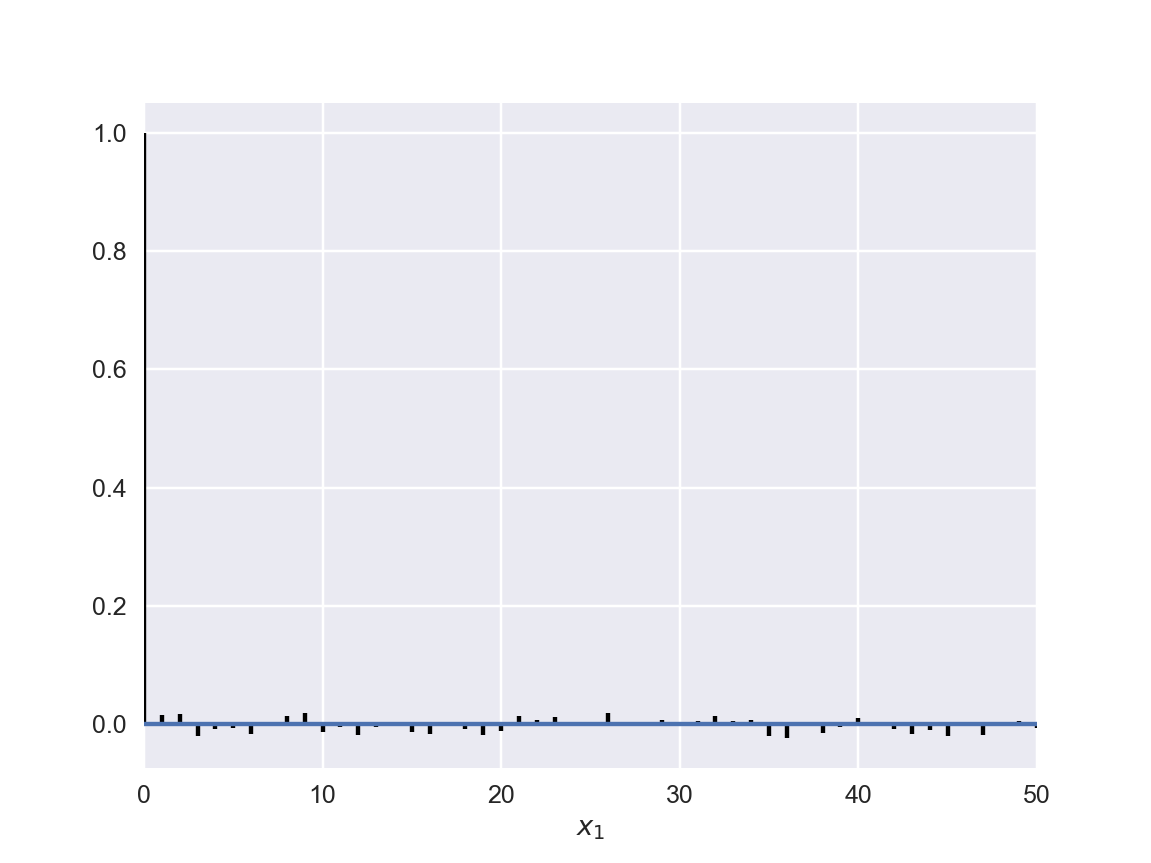

<IPython.core.display.Javascript object>


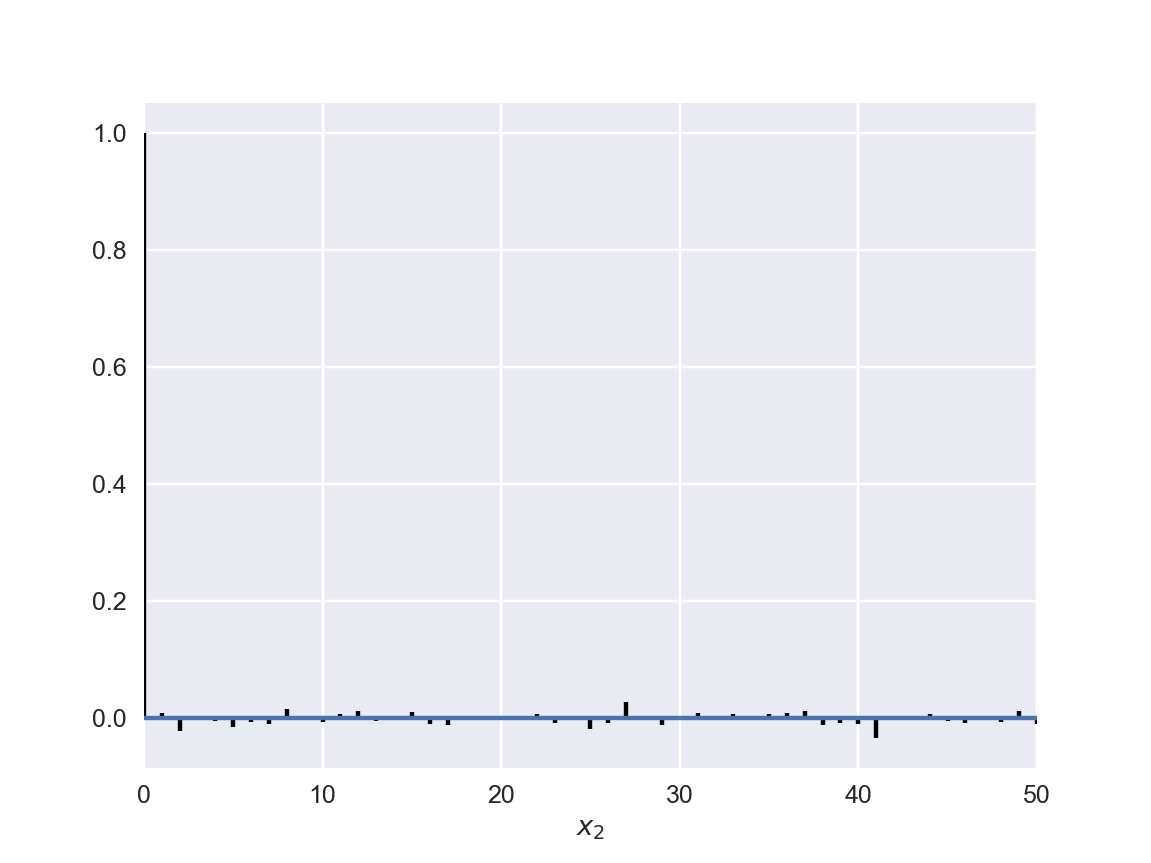

In [110]:
N = 100000
burin_factor = 0.5
thinning = 5

samples = gibbs(x1cond, x2cond, N)
final_samples = samples[int(N*burin_factor)::thinning]

plt.figure()
corrplot(final_samples[:,0])
plt.xlabel(r'$x_1$')

plt.figure()
corrplot(final_samples[:,1])
plt.xlabel(r'$x_2$')
plt.show()

The autocorrelation plots of the two variables show that our choices of burnin and thinning parameters produce non-autocorrelated draws.

(10001, 2)


<IPython.core.display.Javascript object>


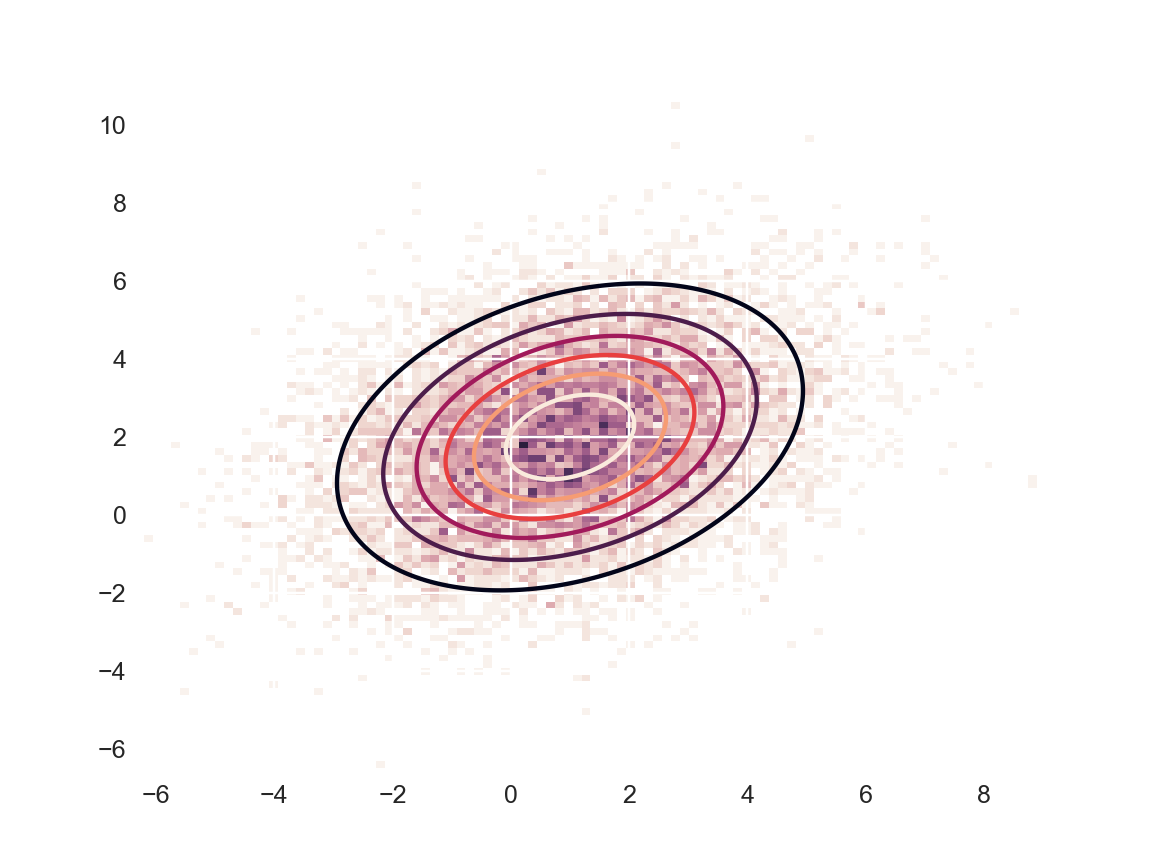

In [115]:
# Plot distribution of samples
print(final_samples.shape)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure()
plt.hist2d(final_samples[:,0], final_samples[:,1], normed=True, bins=100, cmap=cmap)
plt.contour(xx, yy, zz)
plt.show()

***

## Problem 2: Rubber Chickens Bawk Bawk!
In the competitive rubber chicken retail market, the success of a company is built on satisfying the exacting standards of a consumer base with refined and discriminating taste. In particular, customer product reviews are all important. But how should we judge the quality of a product based on customer reviews?

On Amazon, the first customer review statistic displayed for a product is the ***average rating***. The following are the main product pages for two competing rubber chicken products, manufactured by Lotus World and Toysmith respectively:


Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018spring/homework/lotus1.png) |  ![alt](https://am207.github.io/2018spring/homework/toysmith1.png)

Clicking on the 'customer review' link on the product pages takes us to a detailed break-down of the reviews. In particular, we can now see the number of times a product is rated a given rating (between 1 and 5 stars).

Lotus World |  Toysmith
- |  - 
![alt](https://am207.github.io/2018spring/homework/lotus2.png) |  ![alt](https://am207.github.io/2018spring/homework/toysmith2.png)

(The images above are also included on canvas in case you are offline, see below)

In the following, we will ask you to compare these two products using the various rating statistics. **Larger versions of the images are available in the data set accompanying this notebook**.

Suppose that for each product, we can model the probability of the value each new rating as the following vector:
$$
\theta = [\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]
$$
where $\theta_i$ is the probability that a given customer will give the product $i$ number of stars.


### Part A: Inference

1. Suppose you are told that customer opinions are very polarized in the retail world of rubber chickens, that is, most reviews will be 5 stars or 1 stars (with little middle ground). Choose an appropriate Dirichlet prior for $\theta$. Recall that the Dirichlet pdf is given by:
$$
f_{\Theta}(\theta) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad B(\alpha) = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k\alpha_i\right)},
$$
where $\theta_i \in (0, 1)$ and $\sum_{i=1}^k \theta_i = 1$, $\alpha_i > 0 $ for $i = 1, \ldots, k$.

2. Write an expression for the posterior pdf, using a using a multinomial model for observed ratings. Recall that the multinomial pdf is given by:
$$
f_{\mathbf{X}\vert  \Theta}(\mathbf{x}) = \frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k}
$$
where $n$ is the total number of trials, $\theta_i$ is the probability of event $i$ and $\sum_i \theta_i = 1$, and $x_i$ is count of outcome $i$ and $\sum_i x_i = n$. 

  **Note:** The data you will need in order to define the likelihood function should be read off the image files included in the dataset.
  
3. Sample 1,000 values of $\theta$ from the *posterior distribution*.
 
4. Sample 1,000 values of $x$ from the *posterior predictive distribution*.

***

### *Solution*

Based on the assumption that most reviews will be 5 stars or 1 stars with little middle ground, we chose the Dirichilet prior (the concentration parameters) to be $[\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5]=[15, 1, 1, 1, 15]$. Below we sampled 10000 values of $\theta$ from the prior distribution and plotted the marginals $p(\theta_i)$. We can confirm that with this prior 5-star and 1-star ratings are more likely than middle stars. 

<IPython.core.display.Javascript object>


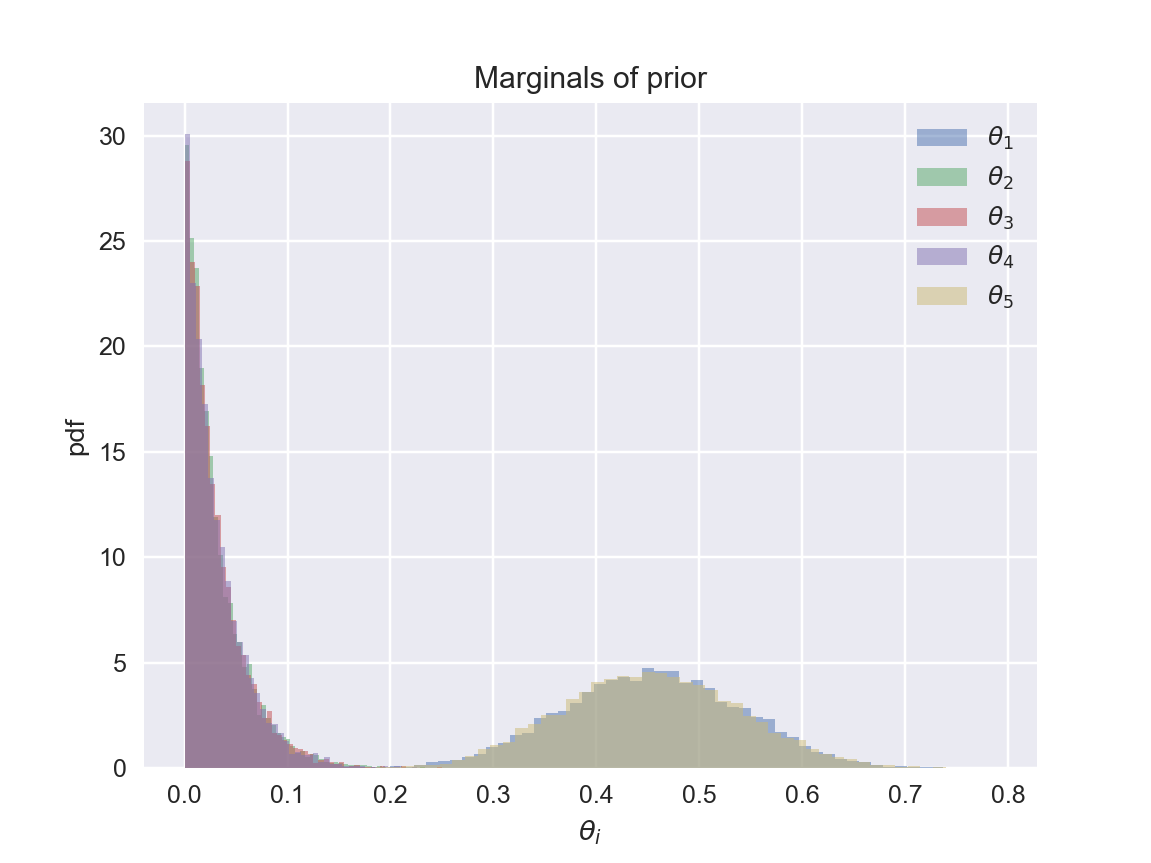

In [88]:
from scipy.stats import dirichlet

def plot_marginals(samples):
    plt.figure()
    for i in range(samples.shape[1]):
        plt.hist(samples[:,i], bins=50, normed=True, alpha=0.5, label=r'$\theta_{%i}$'%(i+1))
    plt.xlabel(r'$\theta_{i}$')
    plt.ylabel('pdf')
    plt.legend()

prior_alpha = np.array([15, 1, 1, 1, 15])
samples = dirichlet.rvs(prior_alpha, size=10000, random_state=None)
plot_marginals(samples)
plt.title('Marginals of prior')
plt.show()

From Bayes Theorem, the posterior for $\theta$ is 
$$
p(\theta \vert D) \propto p(\theta)p(D \vert \theta) = \left(\frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}\right) \left(\frac{n!}{x_1! \ldots x_k!} \theta_1^{x_1} \ldots \theta_k^{x_k} \right) \propto \prod_{i=1}^k \theta_i^{\alpha_i + x_i - 1}.
$$
We recognize this as the density of a Dirichlet distribution with parameters $\alpha_i + x_i$. That is, 
$$p(\theta \vert D)= \frac{1}{B(\alpha')} \prod_{i=1}^k \theta_i^{\alpha'_i - 1}, \quad B(\alpha') = \frac{\prod_{i=1}^k\Gamma(\alpha'_i)}{\Gamma\left(\sum_{i=1}^k\alpha'_i\right)},
$$
where $\alpha'_i = \alpha_i+x_i$ for $i = 1, \ldots, k$.

For each product (Lotus World and Toysmith), we read off the data $\mathbf{x}$, computed the posterior parameters $\mathbf{\alpha'}$, sampled 1000 values of $\theta$ from the posterior distribution, and sampled 1000 values of x from the posterior predictive distribution.

In [37]:
# Two data sets 
lotus_data = np.array([10, 7, 10, 27, 108])
toysmith_data = np.array([59, 34, 29, 44, 244])

# Two sets of posterior parameters corresponding to two data sets 
lotus_posterior_alpha = prior_alpha + lotus_data
toysmith_posterior_alpha = prior_alpha + toysmith_data 

# For each data set, sample 1000 values of theta from the posterior distribution
lotus_theta_samples = dirichlet.rvs(lotus_posterior_alpha, size=1000, random_state=None)
toysmith_theta_samples = dirichlet.rvs(toysmith_posterior_alpha, size=1000, random_state=None)

# For each data set, sample 1000 values of x from the posterior predictive distribution 
lotus_x_samples = np.sum([np.random.multinomial(1, theta) for theta in lotus_theta_samples], axis=0)
toysmith_x_samples = np.sum([np.random.multinomial(1, theta) for theta in toysmith_theta_samples], axis=0)

***

### Part B: Ranking

1. Name at least two major potential problems with using only the average customer ratings to compare products.

  (**Hint:** if product 1 has a higher average rating than product 2, can we conclude that product 1 is better liked? If product 1 and product 2 have the same average rating, can we conclude that they are equally good?)

2. Using the samples from your *posterior distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

3. Using the samples from your *posterior predictive distribution*, determine which rubber chicken product is superior. Justify your conclusion with sample statistics.

4. Finally, which rubber chicken product is superior?

  (**Note:** we're not looking for "the correct answer" here, any sound decision based on a statistically correct interpretation of your model will be fine)

***

### *Solution*

The problems with using only the average customer ratings to compare products are, first, we have no information about the absolute number of ratings, and second, we don't know how the ratings are distributed. If the total number of ratings is small, the average rating can be largely affected by extreme ratings. If both products have the same number of ratings and the same average rating, we still cannot conclude that they are equally good because the rating distributions might be different. 

Using samples from the posterior distribution, we can calculate the mean and MAP estimates of $\theta$. We can also plot the marginals $p(\theta_i)$ to get an idea about the marginal probabilities.

==============Lotus World==============
Mean of theta: [ 0.12859234  0.04136334  0.05555123  0.14352367  0.63096942]
MAP of theta:
theta_1 bin: 0.113308086452 0.127427477022
theta_2 bin: 0.0310312768287 0.0415207327101
theta_3 bin: 0.0360663498288 0.0460977994289
theta_4 bin: 0.128904825313 0.144173931694
theta_5 bin: 0.651170822633 0.671917241616

==============Toysmith==============
Mean of theta: [ 0.16656412  0.0791634   0.06778637  0.10090321  0.58558289]
MAP of theta:
theta_1 bin: 0.150268456388 0.160050461352
theta_2 bin: 0.0619443681791 0.070611664083
theta_3 bin: 0.058307443839 0.0660752439133
theta_4 bin: 0.0984885819649 0.107165346621
theta_5 bin: 0.605065104846 0.620035875017


<IPython.core.display.Javascript object>


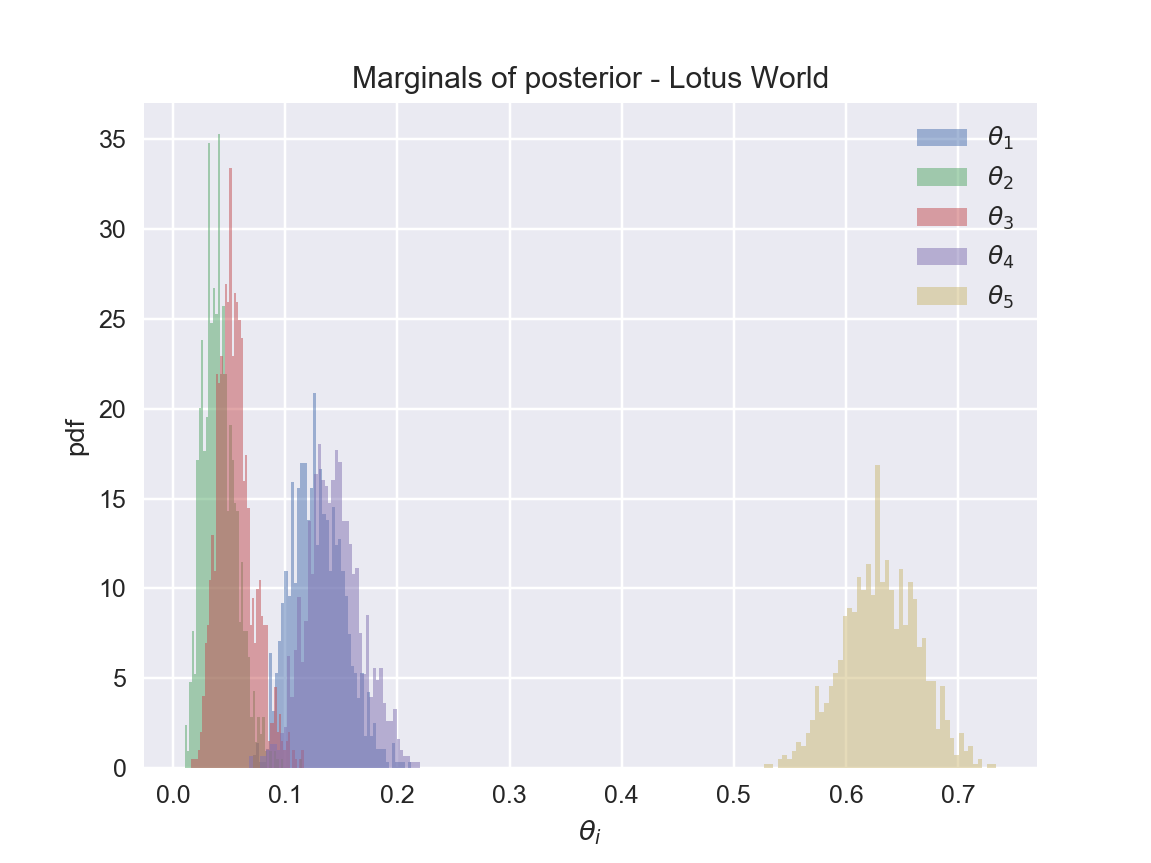

<IPython.core.display.Javascript object>


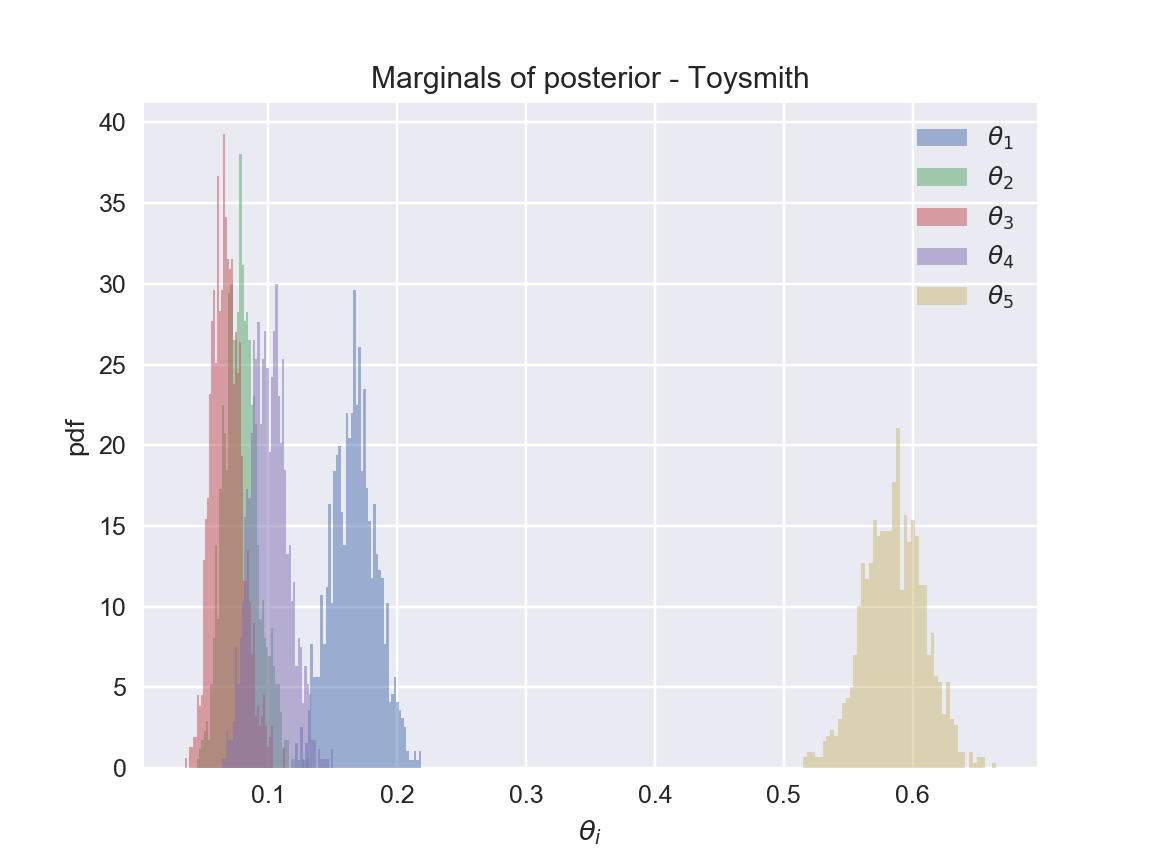

In [91]:
print('==============Lotus World==============')
print('Mean of theta:', np.mean(lotus_theta_samples, axis=0))
print('MAP of theta:')
H, edges = np.histogramdd(lotus_theta_samples)
for edge, i, theta_i in zip(edges, np.unravel_index(H.argmax(), H.shape), range(1,6)):
    print('theta_%s bin:' % (theta_i), edge[i], edge[i+1])

print('\n==============Toysmith==============')
print('Mean of theta:', np.mean(toysmith_theta_samples, axis=0))
print('MAP of theta:')
H, edges = np.histogramdd(toysmith_theta_samples)
for edge, i, theta_i in zip(edges, np.unravel_index(H.argmax(), H.shape), range(1,6)):
    print('theta_%s bin:' % (theta_i), edge[i], edge[i+1])

plot_marginals(lotus_theta_samples)
plt.title('Marginals of posterior - Lotus World')

plot_marginals(toysmith_theta_samples)
plt.title('Marginals of posterior - Toysmith')

plt.show()

According to the statistics above (MAP estimates particularly), the Lotus World product is superior because 5-star and 4-star ratings are more likely for the Lotus World product than for the Toysmith product. 

Using samples from the posterior predictive distributions, we can calculate the posterior predictive estimate of theta:

In [92]:
print('==============Lotus World==============')
print('Posterior predictive of theta:', lotus_x_samples/1000)

print('\n==============Toysmith==============')
print('Posterior predictive of theta:', toysmith_x_samples/1000)

==============Lotus World==============
Posterior predictive of theta: [ 0.134  0.042  0.053  0.146  0.625]

==============Toysmith==============
Posterior predictive of theta: [ 0.165  0.069  0.061  0.101  0.604]


According to the statistics, the Lotus World product is superior because 5-star and 4-star ratings are more likely for the Lotus World product than for the Toysmith product. 

Therefore, overall, the Lotus World product is superior. 
***

## Problem 3:  Implementing Rat Tumors in pymc3

(it may help to see the bioassay lab to see how to structure pymc3 code, and also the examples from lecture).

Let us try to do full Bayesian inference with PyMC3 for the rat tumor example that we have solved using explicit Gibbs sampling in lab7. Remember that the goal is to estimate $\theta_i$, the probability of developing a tumor in a population of female rats that have not received treatement. 

The posterior for the 70 experiments may be written thus:

$$p( \{\theta_i\}, \alpha, \beta  \vert  Y, \{n_i\}) \propto p(\alpha, \beta) \prod_{i=1}^{70} Beta(\theta_i, \alpha, \beta) \prod_{i=1}^{70} Binom(n_i, y_i, \theta_i)$$

Use uniform priors on $[0,1]$ on the alternative variables $\mu$ (the mean of the beta distribution) and $\nu$:

$$\mu = \frac{\alpha}{\alpha+\beta}, \nu = (\alpha+\beta)^{-1/2}$$

You may then write $\alpha$ and $\beta$ as deterministics which depend on $\mu$ and $\nu$.

Here is the data:

In [2]:
tumordata="""0 20 
0 20 
0 20 
0 20 
0 20 
0 20 
0 20 
0 19 
0 19 
0 19 
0 19 
0 18 
0 18 
0 17 
1 20 
1 20 
1 20 
1 20 
1 19 
1 19 
1 18 
1 18 
3 27 
2 25 
2 24 
2 23 
2 20 
2 20 
2 20 
2 20 
2 20 
2 20 
1 10 
5 49 
2 19 
5 46 
2 17 
7 49 
7 47 
3 20 
3 20 
2 13 
9 48 
10 50 
4 20 
4 20 
4 20 
4 20 
4 20 
4 20 
4 20 
10 48 
4 19 
4 19 
4 19 
5 22 
11 46 
12 49 
5 20 
5 20 
6 23 
5 19 
6 22 
6 20 
6 20 
6 20 
16 52 
15 46 
15 47 
9 24 
"""

In [3]:
# Format data into two arrays tumory and tumorn (using code from lab7)
tumortuples=[e.strip().split() for e in tumordata.split("\n")]
tumory=np.array([np.int(e[0].strip()) for e in tumortuples if len(e) > 0])
tumorn=np.array([np.int(e[1].strip()) for e in tumortuples if len(e) > 0])
tumory, tumorn

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  5,
         2,  5,  2,  7,  7,  3,  3,  2,  9, 10,  4,  4,  4,  4,  4,  4,  4,
        10,  4,  4,  4,  5, 11, 12,  5,  5,  6,  5,  6,  6,  6,  6, 16, 15,
        15,  9]),
 array([20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20,
        20, 19, 19, 18, 18, 27, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49,
        19, 46, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20,
        48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46,
        47, 24]))

### Part A:  Report at least the following diagostics on your samples

1. Autocorrelation (correlation dying by lag 20 is fine)
2. Parameter trace correlation after burnin
3. Gewecke
4. Gelman-Rubin
5. $n_{eff}$ (Number of Effective Samples)

***

### *Solution*

In [4]:
import pandas as pd
import pymc3 as pm

# Build model 
with pm.Model() as tumor_model:

    # Uniform hyperpriors on alternative variables mu and nu 
    mu = pm.Uniform('mu', 0, 1)
    nu = pm.Uniform('nu', 0, 1)
    
    # Hyperparameters alpha and beta are deterministics dependant on mu and nu 
    alpha = pm.Deterministic('alpha', mu/nu**2)
    beta = pm.Deterministic('beta', (1-mu)/nu**2)
    
    # Prior on theta and Data likelihood
    thetas = pm.Beta('thetas', alpha=alpha, beta=beta, shape=70)
    Y = pm.Binomial('Y', n=tumorn, p=thetas, observed=tumory)

with tumor_model:

    # Draw posterior samples
    tumor_traces = pm.sample(50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [thetas_logodds__, nu_interval__, mu_interval__]
100%|██████████| 50500/50500 [03:18<00:00, 254.02it/s]
The number of effective samples is smaller than 25% for some parameters.


In [5]:
# Choose number of burnin samples, report diagnostics on the rest of samples
burnin = 25000
traces = tumor_traces[burnin:]

<IPython.core.display.Javascript object>


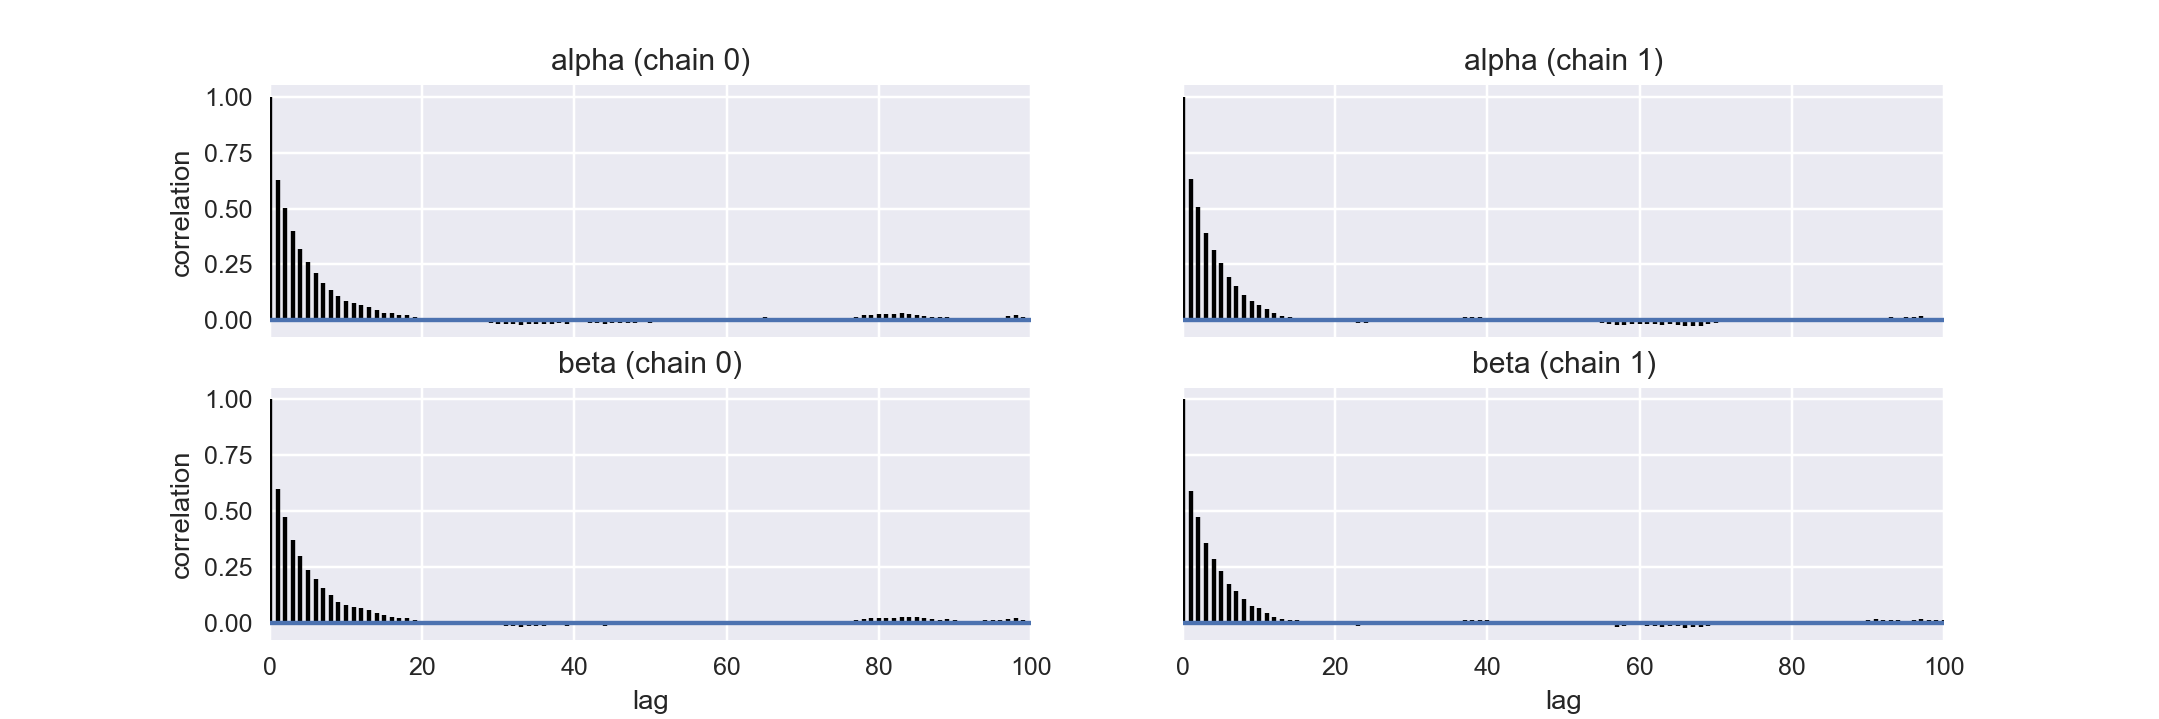

In [8]:
pm.autocorrplot(traces, varnames=['alpha', 'beta'])
plt.show()

<IPython.core.display.Javascript object>


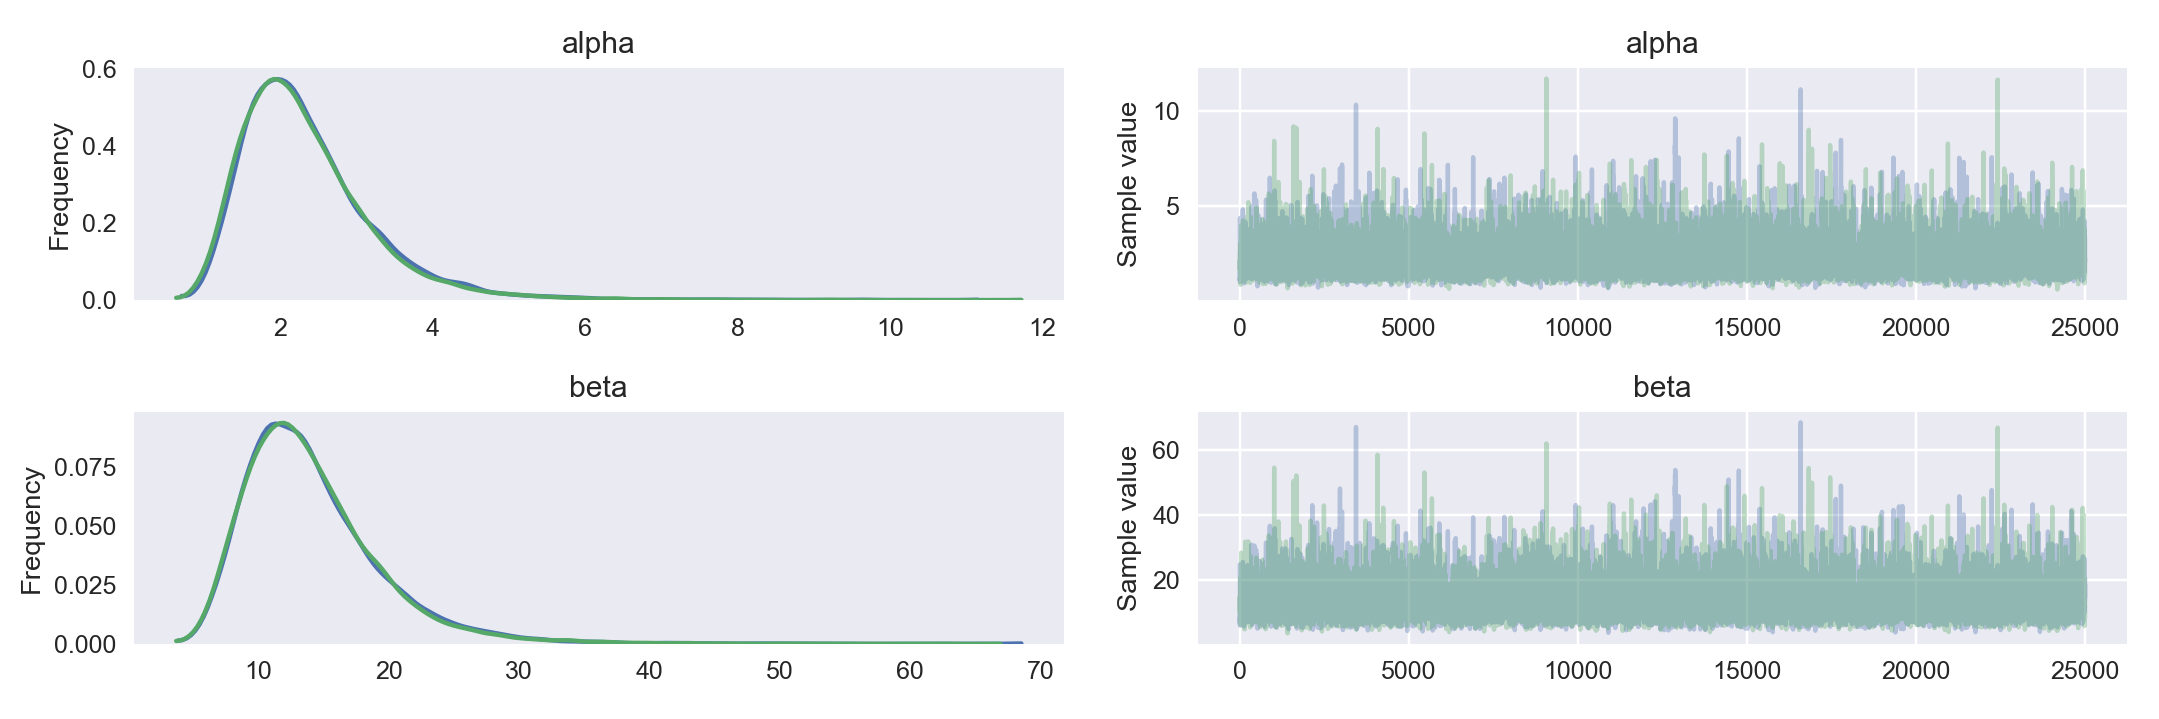

In [9]:
pm.traceplot(traces, varnames=['alpha', 'beta'])
plt.show()

<IPython.core.display.Javascript object>


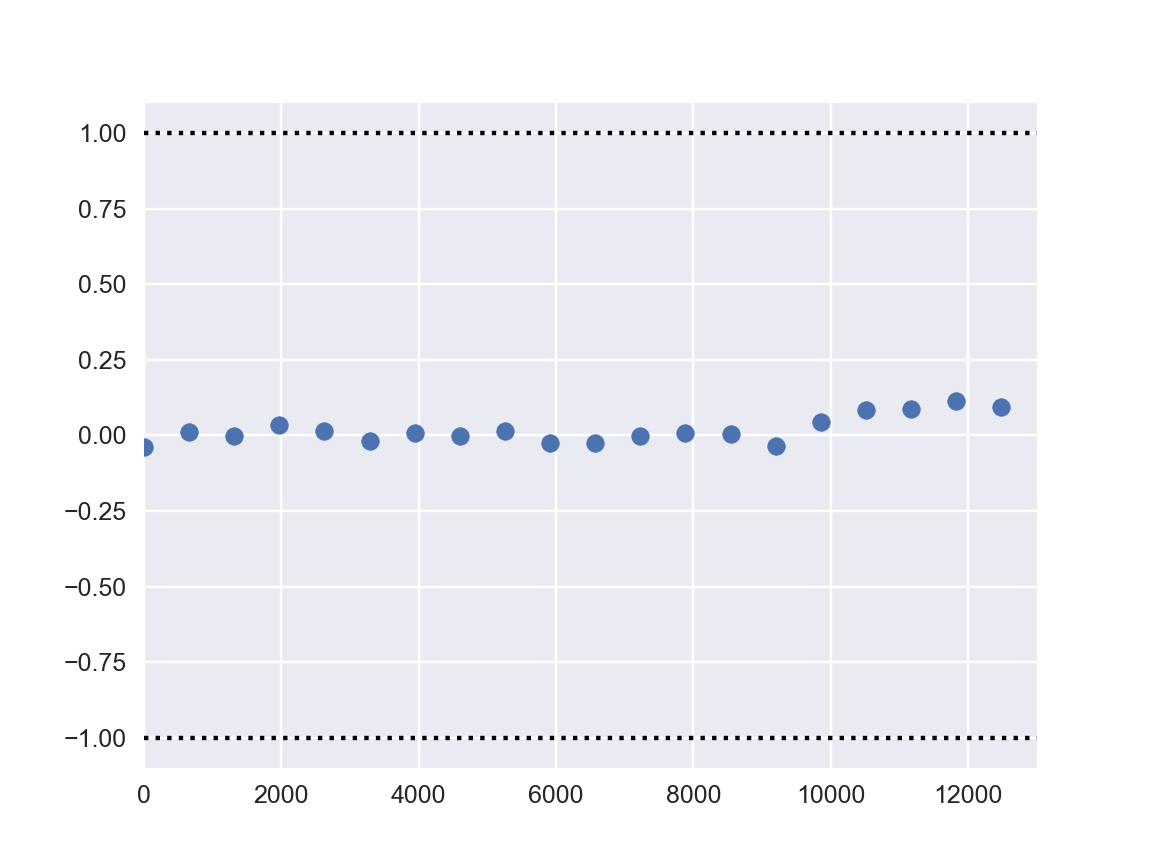

<IPython.core.display.Javascript object>


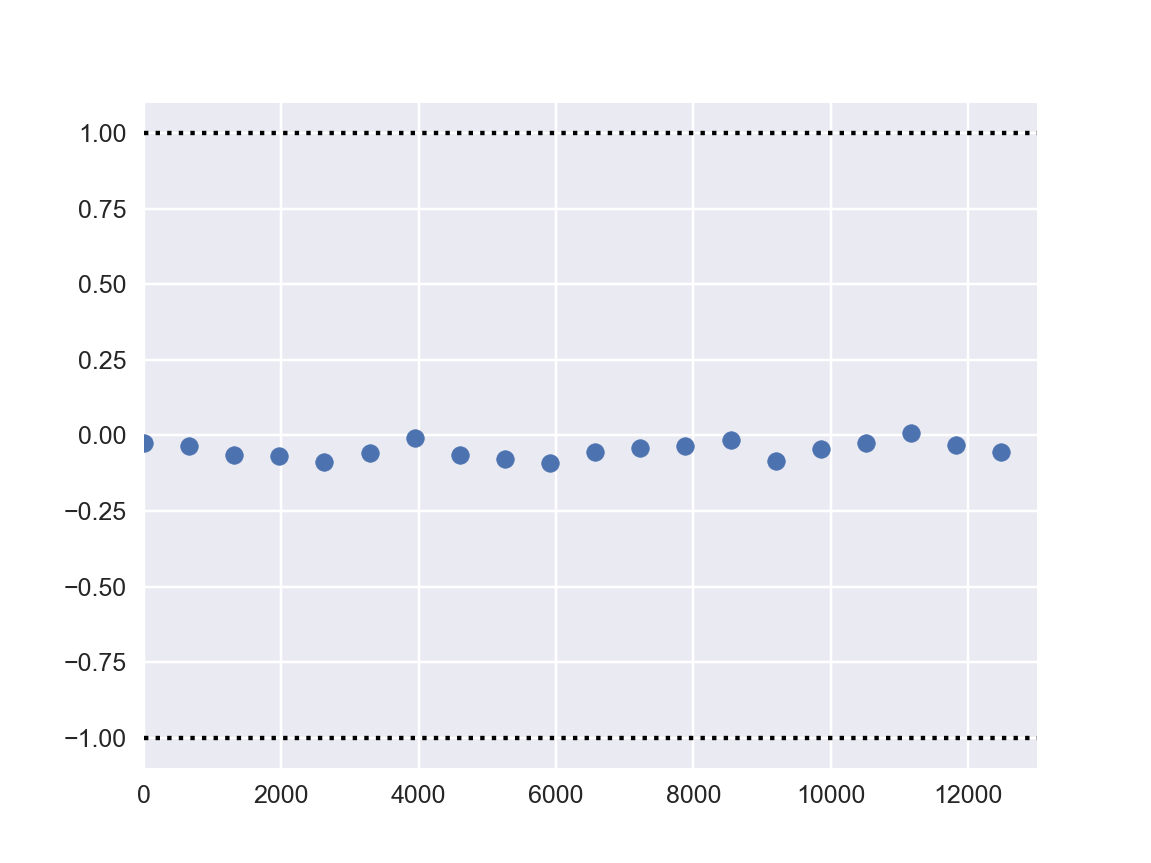

In [10]:
z = pm.geweke(traces)

plt.figure()
plt.scatter(*z[0]['alpha'].T)
plt.hlines([-1,1], 0, 13000, linestyles='dotted')
plt.xlim(0, 13000)

plt.figure()
plt.scatter(*z[1]['alpha'].T)
plt.hlines([-1,1], 0, 13000, linestyles='dotted')
plt.xlim(0, 13000)

plt.show()

In [11]:
pm.gelman_rubin(traces)

{'alpha': 1.0000406944339542,
 'beta': 1.0000162072787915,
 'mu': 1.0000158306072395,
 'nu': 1.000028722551997,
 'thetas': array([ 0.99999397,  0.99998403,  1.0000068 ,  1.00003382,  0.99999421,
         0.99998312,  0.99998084,  1.00006807,  0.99998024,  1.0000228 ,
         0.99998623,  0.99999649,  0.9999903 ,  0.99999443,  1.00005715,
         1.00001007,  0.99999436,  0.99998139,  0.99998053,  0.99998254,
         1.00003195,  0.99998069,  0.99998141,  1.00004315,  1.00004111,
         0.99999123,  0.999999  ,  0.99998006,  0.99998319,  0.99998001,
         0.99998102,  0.99998156,  1.00000862,  0.99998119,  0.99998424,
         0.99998212,  0.99998864,  1.0000041 ,  1.00000053,  1.0000326 ,
         0.99998413,  0.99998023,  1.00005274,  0.99998665,  0.99998272,
         0.99999683,  0.99998696,  0.99999116,  0.99999941,  0.99999732,
         0.99998544,  0.9999834 ,  0.9999821 ,  0.99998103,  0.99998057,
         0.999983  ,  1.00000521,  1.0000137 ,  0.99998044,  0.99998649,
  

In [12]:
pm.effective_n(traces)

{'alpha': 7082.0,
 'beta': 7589.0,
 'mu': 32647.0,
 'nu': 8403.0,
 'thetas': array([ 50000.,  32411.,  50000.,  37400.,  34709.,  31978.,  50000.,
         39669.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
         50000.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
         50000.,  50000.,  50000.,  50000.,  47557.,  50000.,  50000.,
         50000.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
         50000.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
         50000.,  50000.,  50000.,  50000.,  46746.,  50000.,  50000.,
         50000.,  50000.,  44840.,  50000.,  50000.,  50000.,  50000.,
         42978.,  50000.,  50000.,  50000.,  50000.,  50000.,  46320.,
         50000.,  50000.,  50000.,  50000.,  40632.,  40618.,  50000.])}

In [13]:
pm.summary(traces)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,0.142704,0.013457,0.000067,0.116847,0.169615,32647.0,1.000016
nu,0.256635,0.043463,0.000426,0.172974,0.343044,8403.0,1.000029
alpha,2.359150,0.886345,0.009643,1.002849,4.069259,7082.0,1.000041
beta,14.245373,5.341629,0.056574,5.965784,24.572547,7589.0,1.000016
thetas__0,0.062725,0.041288,0.000193,0.000194,0.141891,50000.0,0.999994
thetas__1,0.062462,0.041469,0.000218,0.000042,0.141769,32411.0,0.999984
thetas__2,0.062361,0.041109,0.000190,0.000693,0.141671,50000.0,1.000007
thetas__3,0.062840,0.041677,0.000225,0.000832,0.143106,37400.0,1.000034
thetas__4,0.062451,0.041500,0.000186,0.000624,0.142289,34709.0,0.999994
thetas__5,0.062697,0.041088,0.000195,0.000510,0.141800,31978.0,0.999983


***

### Part B:  Posterior predictive check

Recall from lab notes that in a hierarchical model there are two kinds of posterior predictions that are useful. (1) The distribution of future observations $y_i^*$  given a $\theta_i$, and (2) The distribution of observations $y_j^*$  drawn from a future $\theta_j$ drawn from the super-population (i.e. using the Beta on the estimated hyper parameters).

1. Carry out posterior predictive checks by using `sample_ppc` to generate posterior-predictives for all 70 experiments. This generates predictives of the first type above. 

2. Plot histograms for these predictives with the actual value shown as a red-dot against the histogram (as in the coal disasters model in lecture 14). Is the data consistent with the predictive?

***

### *Solution*

100%|██████████| 1000/1000 [00:00<00:00, 2522.46it/s]


(1000, 70)


<IPython.core.display.Javascript object>


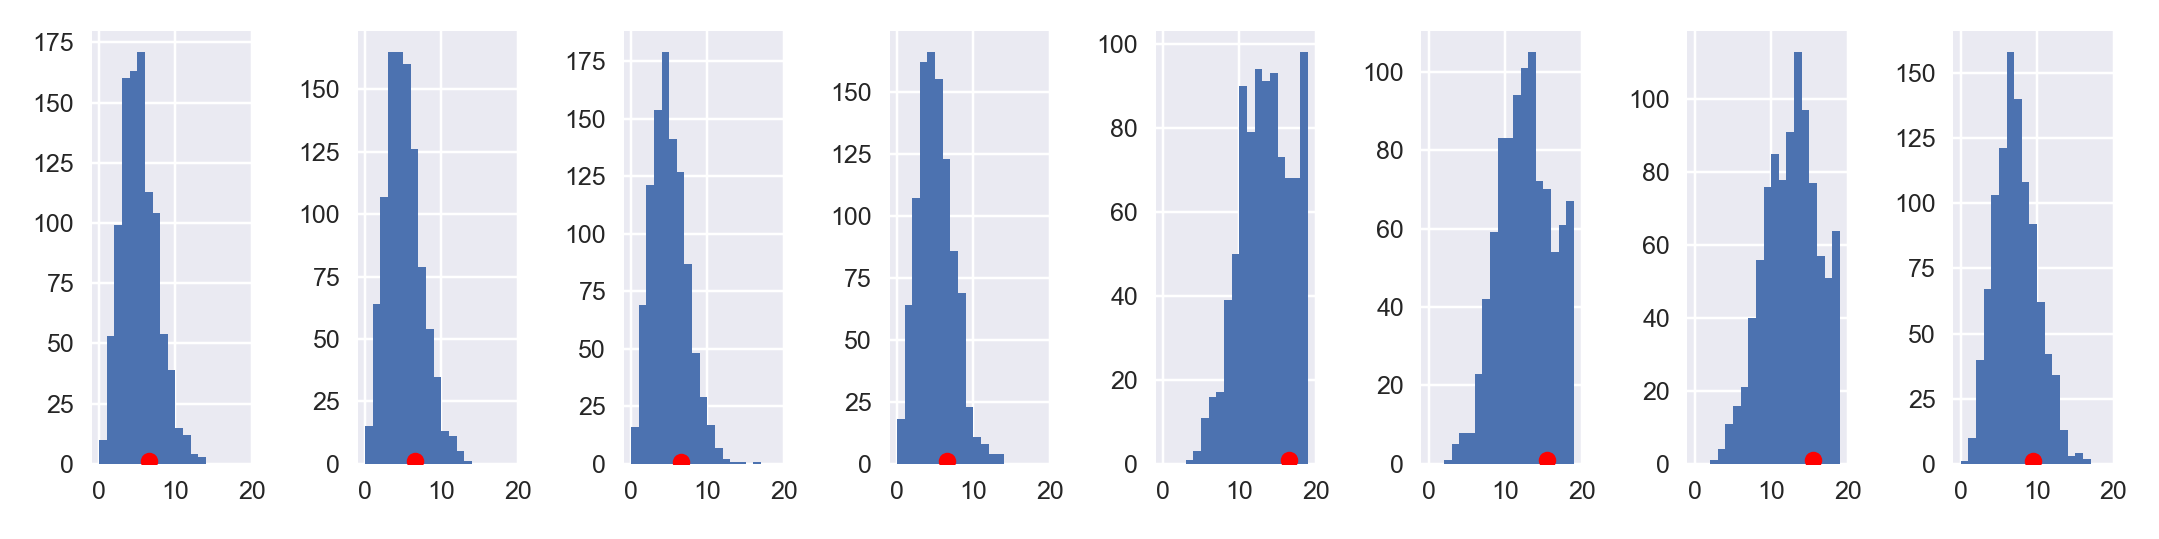

In [17]:
with tumor_model:
    tumory_sim = pm.sample_ppc(traces, samples=1000)

print(tumory_sim['Y'].shape)

# Plot histograms for predictives of the last 8 experiments 
fig, axes = plt.subplots(1, 8, figsize=(12, 3))

for obs, sim, ax in zip(tumory[-8:], tumory_sim['Y'].T[-8:], axes):
    ax.hist(sim, bins=range(20))
    ax.plot(obs+0.5, 1, 'ro')
plt.tight_layout()

The data is consistent with the predictives for the last 8 experiments.
***

### Part C:  Shrinkage

1. Plot the posterior median of the death rate parameters $\theta_1, \theta_2, ...\theta_{70}$ against the observed death rates ($y_i/n_i$)

2. Explain the shrinkage by comparing against a 45 degree line as done in the lab.

***

### *Solution*

<IPython.core.display.Javascript object>


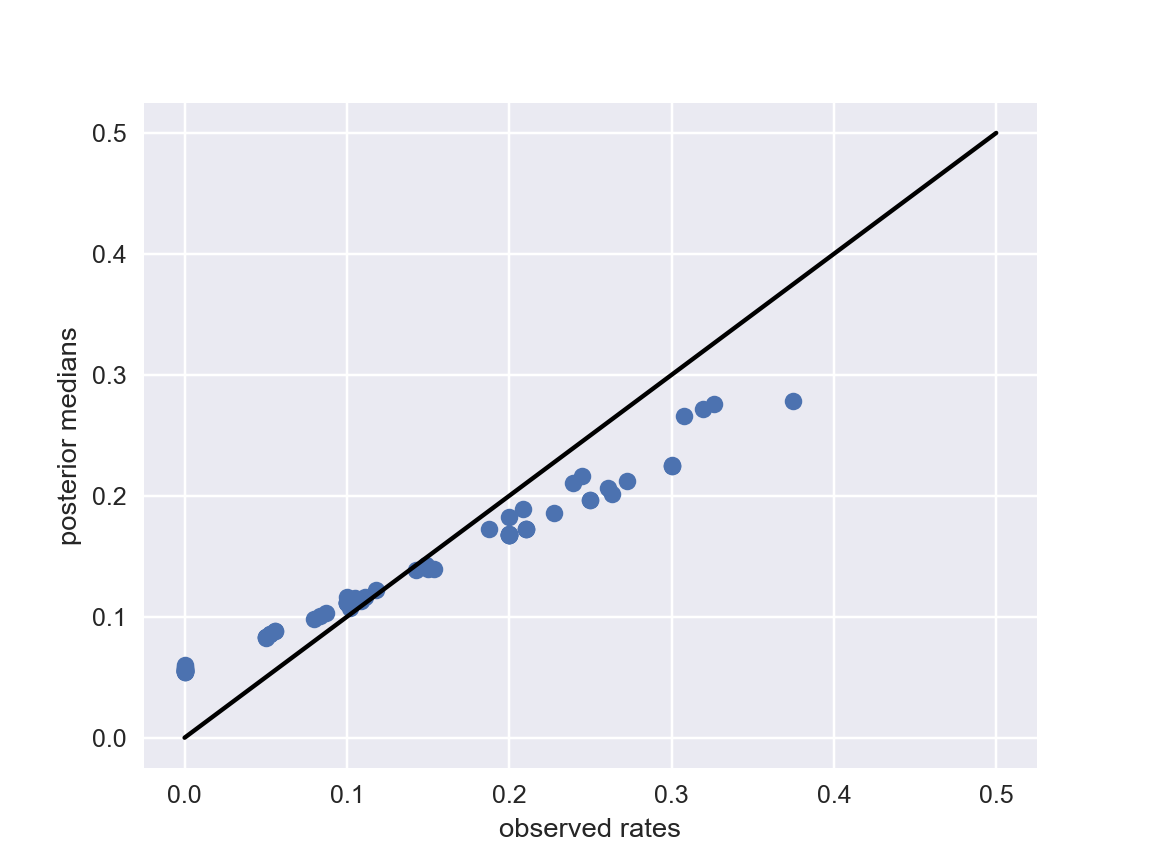

In [18]:
post_medians = np.median(traces['thetas'], axis=0)

plt.figure()
plt.plot(tumory/tumorn, post_medians, 'o')
plt.plot([0,0.5], [0,0.5], 'k-')
plt.xlabel("observed rates")
plt.ylabel("posterior medians")
plt.show()

The posterior medians shrunk towards flatness. A flat line corresponds to total pooling and a 45 degree line corresponds to unpooled estimates. Thus this shrinkage is as expected since we are doing partial pooling. 

***

### PART D:  Experiment 71

Consider an additional experiment -- experiment 71 -- in which 4 out of 14 rats died. 

1. Calculate the marginal posterior of $\theta_{71}$, the "new" experiment,

2. Find the $y_{71}^*$ posterior predictive for that experiment.

**HINT: ** The critical thing to notice is that the posterior including the 71st experiment factorizes:

$$p(\theta_{71}, \theta_{1..70}, \alpha, \beta \vert  D)  \propto p(y_{71} \vert n_{71}, \theta_{71} ) p(\theta_{71} \vert \alpha, \beta) p(\theta_{1..70}, \alpha, \beta \vert  D)$$

Then we simply marginalize over everything to get the $\theta_{71}$ posterior:

$$p(\theta_{71} \vert \theta_{1..70}, \alpha, \beta, D) = \int d\alpha \,d\beta \,d\theta_{1..70} \,p(\theta_{71}, \theta_{1..70}, \alpha, \beta \vert  D)$$

$$=  \int d\alpha \,d\beta  Beta(\alpha+y_{71}, \beta + n_{71} - y_{71})  \int_{\theta_{1..70}} \,d\theta_{1..70} \,p(\theta_{1..70}, \alpha, \beta \vert  D)$$

The $y_{71}^*$ posterior predictive can be found in the usual way.

***

### *Solution*

<IPython.core.display.Javascript object>


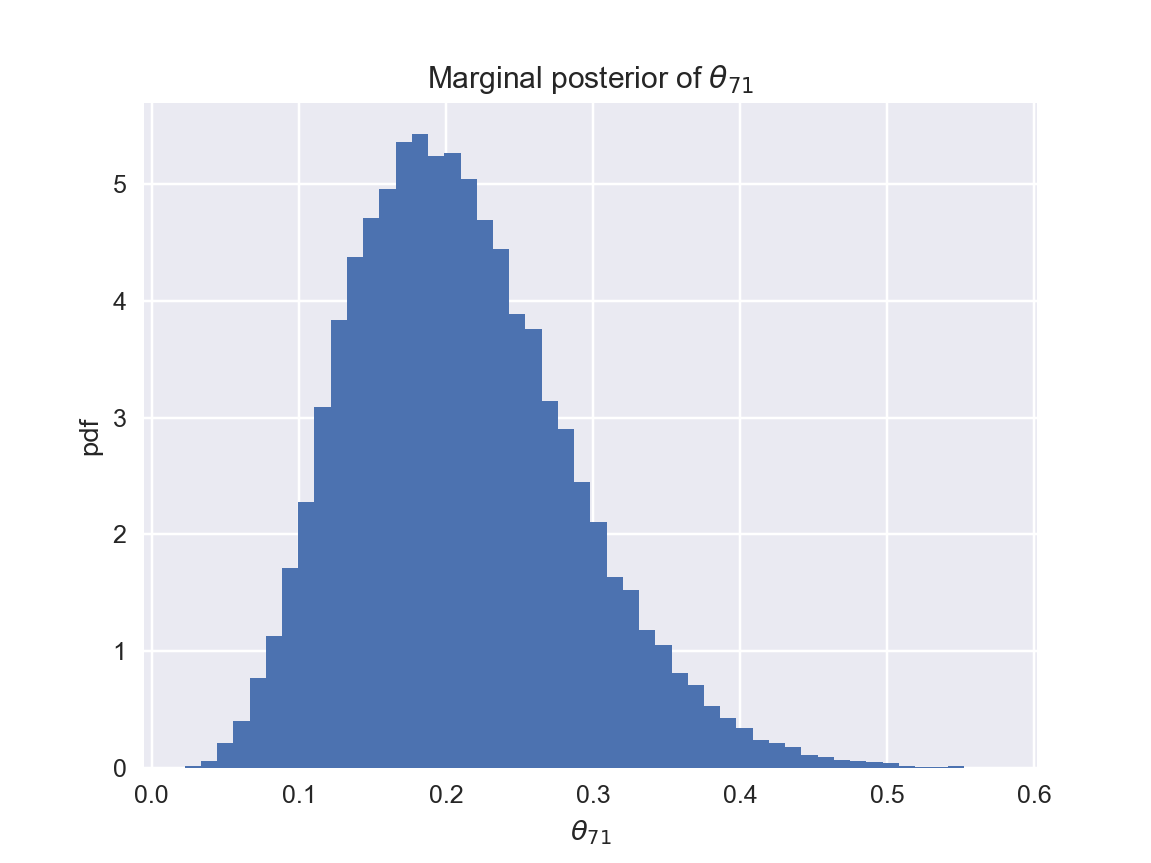

<IPython.core.display.Javascript object>


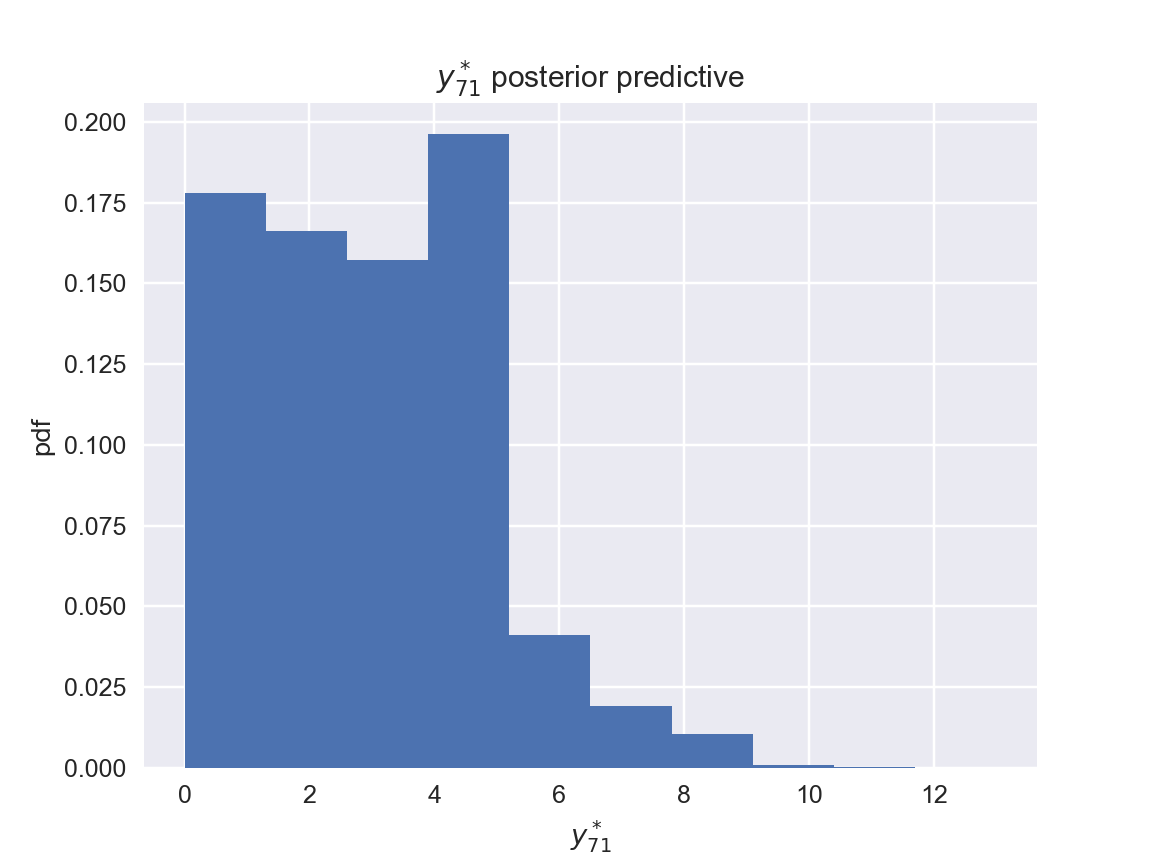

In [35]:
from scipy.stats import beta, binom

post71 = beta.rvs(traces['alpha']+4, traces['beta']+10)
y71 = binom.rvs(n=14, p=post71)

plt.figure()
plt.hist(post71, normed=True, bins=50)
plt.xlabel(r'$\theta_{71}$')
plt.ylabel('pdf')
plt.title(r'Marginal posterior of $\theta_{71}$')

plt.figure()
plt.hist(y71, normed=True)
plt.xlabel(r'$y_{71}^*$')
plt.ylabel('pdf')
plt.title(r'$y_{71}^*$ posterior predictive')
plt.show()

***